
 What are the most frequently used Computer Skills in Toronto?
## (Based on StackOverflow posts in 2017.)

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import datetime

# Read the data from the result of the query file
# Downloaded from "https://data.stackexchange.com/stackoverflow/query/878134/toronto"
#df=pd.read_csv("Toronto20170708_20180707.csv", sep=',')

df=pd.read_csv("Singapore2017.csv", sep=',')

#print (df.head())
locations = set(df['Location'].tolist())
#print(locations)
df1 = df.loc[:,['Date', 'TagName', 'TagId']]
#print (df1)
print('We are investigating', len(df1), 'posts between', min(df1['Date']),'to', max(df1['Date']),\
      'from', len(locations), 'locations: ', locations, '\n')
#print(df1.sort_values(('Date'),ascending=False))
df2 = df1.loc[:, ['TagName','TagId']]
#print(df2)
df3 = df2.groupby(['TagName']).agg({'count'}).sort_values(('TagId', 'count'), ascending=False)
df4 = df3.head(5)
most_frequent_skills = df4.index.tolist()

We are investigating 14314 posts between 2017-01-01 00:55:04 to 2017-12-31 18:17:33 from 2 locations:  {'Singapore, Singapore', 'Singapore'} 



# What is the most frequent skill used in Boston during last year?

most_frequent_skills:  ['javascript', 'css', 'python', 'html', 'java']

As it can be seen from the chart, javascript is the most used computer skill.

Most frequent recent computer skills used in Toronto 
 between 2017-01-01 00:55:04 to 2017-12-31 18:17:33


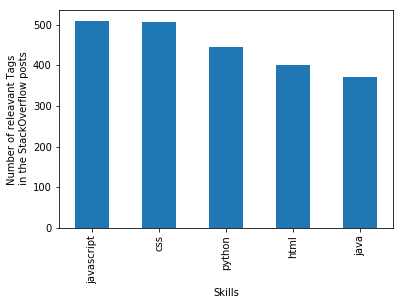

In [2]:
print('most_frequent_skills: ', most_frequent_skills)

print('\nAs it can be seen from the chart,', df4[('TagId','count')].idxmax(), 'is the most used computer skill.\n')

fig = df4.plot.bar(title = print('Most frequent recent computer skills used in Toronto \n between', min(df1['Date']), 'to',  max(df1['Date'])));
fig.legend_.remove();
fig.set_xlabel("Skills");
fig.set_ylabel("Number of releavant Tags\n in the StackOverflow posts");

# What is the technology trend in Toronto?

            Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
css          52   76   39   35   42   39   37   42   49   33   32   29
html         35   46   30   29   30   31   34   28   36   38   32   32
java         30   36   27   22   26   32   25   39   36   36   38   25
javascript   26   34   30   33   37   34   53   25   60   52   68   57
python       22   26   37   30   36   32   42   44   44   31   59   42


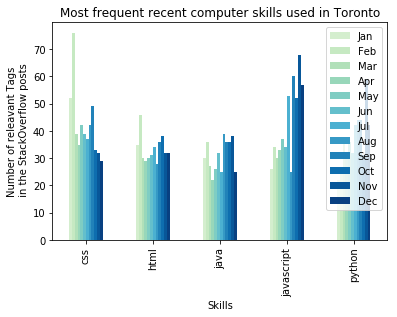

In [3]:
df50 = df.loc[:, ['Date','TagName','TagId']].sort_values(('Date'),ascending=True)
df51 = df50.drop(df50[(~df50['TagName'].isin(most_frequent_skills))].index)
df51['Date'] = pd.to_datetime(df51.Date, format='%Y-%m-%d')
df51['Month'] = pd.DatetimeIndex(df51['Date']).month
df51['Year'] = pd.DatetimeIndex(df51['Date']).year
df52 = df51.loc[:,['Year','Month', 'TagName', 'TagId']]
df53 = df52.drop(df52[(df52['Year'] != 2017)].index)
df53 = df53.drop(columns = 'Year')
#print('df53:\n',df53)
df55 = df53.groupby(['TagName', 'Month']).agg({'count'}).sort_values(('TagId','count'),ascending=False) 
#print('d55:\n', df55)
data = pd.DataFrame()
month_list = []
for i in df53['Month'].unique():
    MM = df55.xs(i, level = 1)
    month_list.append(calendar.month_abbr[i])
    data = pd.concat([data,MM], axis=1, join='outer')
data.columns = month_list
print(data)
colors = plt.cm.GnBu(np.linspace(0.2, 1, 12))
fig = data.plot.bar(title = 'Most frequent recent computer skills used in Toronto', color=colors);
fig.set_xlabel("Skills");
fig.set_ylabel("Number of releavant Tags\n in the StackOverflow posts");

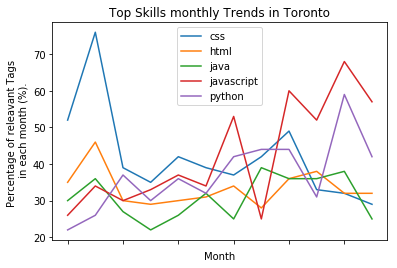

In [4]:
data.T.plot()
plt.legend(loc='best')
plt.title('Top Skills monthly Trends in Toronto')
plt.xlabel("Month");
plt.ylabel("Percentage of releavant Tags \n in each month (%).");
plt.show()

In [5]:
df70 = df.loc[:, ['Date','TagName','TagId']].sort_values(('Date'),ascending=True)
#df71 = df50.drop(df50[(~df50['TagName'].isin(most_frequent_skills))].index)
df70['Date'] = pd.to_datetime(df70.Date, format='%Y-%m-%d')
df70['Month'] = pd.DatetimeIndex(df70['Date']).month
